In [97]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [98]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [99]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


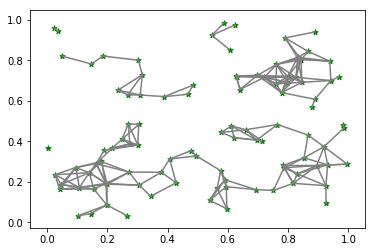

In [100]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,8,73,88,99,37,77,98,47,59,21,52,68,2,66,69,49,61,94,44,26,83,90,31,62,25,40,41,5,3,16,22,12,30,24,42,86,20,64,79,93,14,29,39,72,46,96,1,38,55,23,51,57,13,6,7,71,92,67
4,95
9,82,18,27
10,19,32,43,48,56,74,85,11,28,54,60,89,97,80,15,17,58,33,36,70,34,50
35
45,53,63,87,75,76,81,65,78,91,84


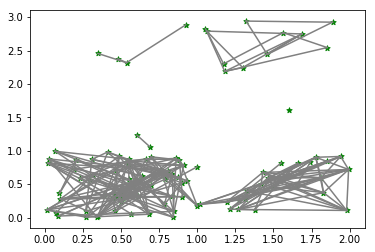

In [101]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,28,78,64,1,92,51,71,30,74,57,32,43,45,7,86,6
has a cycle consisting of the nodes:

28,78,0
The component consisting of the nodes:

2,85,58,61,95,81
has a cycle consisting of the nodes:

58,61,85
The component consisting of the nodes:

3,23,60,77,84,16,17,39,94,54,80,9,25,53,55,89,52,4,75,63,5,29,99,88,44,47,65,8,76,21,87,22,82,41,18,34,72
has a cycle consisting of the nodes:

23,60,3
The component consisting of the nodes:

10,12
has no cycle

The component consisting of the nodes:

11,15,33,38,68,96,83,24,19
has a cycle consisting of the nodes:

15,38,11
The component consisting of the nodes:

13,56
has no cycle

The component consisting of the nodes:

14,46,66,67,97,26,91
has a cycle consisting of the nodes:

46,97,14
The component consisting of the nodes:

20,49,50,59,73,62
has a cycle consisting of the nodes:

49,50,20
The component consisting of the nodes:

27,48,93,98
has a cycle consisting of the nodes:

48,98,27
The component consisting 

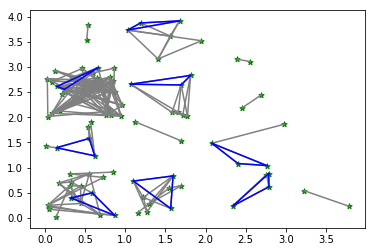

In [96]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")